In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [2]:
book = pd.read_csv(r"D:\z Data Science\Assignment\Assignment\Assignment 10\book.csv",encoding=('ISO-8859-1'))

In [3]:
book

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6
...,...,...,...,...
9995,9996,162121,American Fried: Adventures of a Happy Eater.,7
9996,9997,162121,Cannibal In Manhattan,9
9997,9998,162121,How to Flirt: A Practical Guide,7
9998,9999,162121,Twilight,8


In [4]:
book_1 = book.drop(book.columns[0], axis=1) 

In [5]:
book_2 = book_1.rename({'User.ID':'user_id' , 'Book.Title': 'book_title', 'Book.Rating':'book_rating' },axis ='columns')

In [6]:
book_2

,user_id,book_title,book_rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6
...,...,...,...
9995,162121,American Fried: Adventures of a Happy Eater.,7
9996,162121,Cannibal In Manhattan,9
9997,162121,How to Flirt: A Practical Guide,7
9998,162121,Twilight,8


In [7]:
len(book_2.user_id.unique())

2182

In [8]:
len(book_2.book_title.unique())

9659

In [9]:
book_2.duplicated().sum()

2

In [10]:
book_2.loc[book_2.duplicated(keep=False),:]

,user_id,book_title,book_rating
5050,2152,Le nouveau soleil de Teur,7
5051,2152,Le nouveau soleil de Teur,7
7045,3757,The Magician's Tale,7
7439,3757,The Magician's Tale,7


In [11]:
book_2.drop_duplicates(keep=False).shape

(9996, 3)

In [12]:
book_3 = book_2.drop([5050,7045], axis=0) 

In [13]:
book_3.duplicated().sum()

0

In [14]:
book_3

,user_id,book_title,book_rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6
...,...,...,...
9995,162121,American Fried: Adventures of a Happy Eater.,7
9996,162121,Cannibal In Manhattan,9
9997,162121,How to Flirt: A Practical Guide,7
9998,162121,Twilight,8


In [15]:
book_3.sort_values(["user_id","book_title"], inplace = True)

In [16]:
book_4=book_3.drop_duplicates(subset=['user_id'])

In [17]:
book_4

,user_id,book_title,book_rating
2399,8,Ancient Celtic Romances,5
2406,9,The Book of Kells: Selected Plates in Full Color,6
2407,10,SINGLE &amp; SINGLE,6
2408,12,Apocalypse Wow,10
2410,14,A Cold Heart: An Alex Delaware Novel,5
...,...,...,...
2376,278846,Man's Search For Meaning,8
2377,278849,The Kitchen God's Wife (Vintage Contemporaries),9
2379,278851,Black Notice,5
2392,278852,Bola da vez: Romance policial (Cole????o Roman...,8


In [18]:
len(book_4.user_id.unique())

2182

In [19]:
len(book_4.book_title.unique())

2162

<AxesSubplot:>

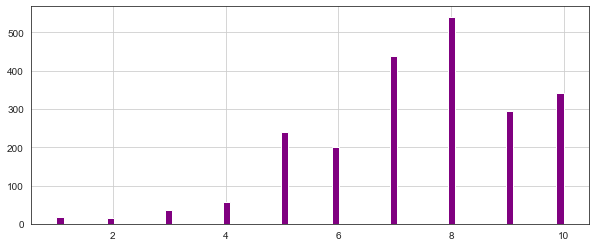

In [20]:
plt.figure(figsize=(10,4))
book_4['book_rating'].hist(bins=70,color='purple')

In [21]:
user_book = book_4.pivot(index='user_id',
                                 columns='book_title',
                                 values='book_rating').reset_index(drop=True)

In [22]:
user_book

book_title,"Jason, Madison &amp",'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",1001 Brilliant Ways to Checkmate,101 Bright Ideas: Esl Activities for All Ages,...,YESTERDAY'S NEWS : YESTERDAY'S NEWS,Year's Best Fantasy and Horror: Sixteenth Edition,You Are Not a Stranger Here : Stories,You're the One,Yukon Ho!,Yuwipi: Vision and Experience in Oglala Ritual,Zen in the Art of Archery (Vintage Spiritual Classics),Zodiac: The Eco-Thriller,Zombies of the Gene Pool,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
user_book.index = book_4.user_id.unique()

In [24]:
user_book

book_title,"Jason, Madison &amp",'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",1001 Brilliant Ways to Checkmate,101 Bright Ideas: Esl Activities for All Ages,...,YESTERDAY'S NEWS : YESTERDAY'S NEWS,Year's Best Fantasy and Horror: Sixteenth Edition,You Are Not a Stranger Here : Stories,You're the One,Yukon Ho!,Yuwipi: Vision and Experience in Oglala Ritual,Zen in the Art of Archery (Vintage Spiritual Classics),Zodiac: The Eco-Thriller,Zombies of the Gene Pool,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book)
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
user_book.fillna(0, inplace=True)

In [26]:
user_book

book_title,"Jason, Madison &amp",'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",1001 Brilliant Ways to Checkmate,101 Bright Ideas: Esl Activities for All Ages,...,YESTERDAY'S NEWS : YESTERDAY'S NEWS,Year's Best Fantasy and Horror: Sixteenth Edition,You Are Not a Stranger Here : Stories,You're the One,Yukon Ho!,Yuwipi: Vision and Experience in Oglala Ritual,Zen in the Art of Archery (Vintage Spiritual Classics),Zodiac: The Eco-Thriller,Zombies of the Gene Pool,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book)
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation

In [28]:
user_sim = 1 - pairwise_distances( user_book.values,metric='cosine')

In [29]:
user_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [30]:
user_sim_df = pd.DataFrame(user_sim)

In [31]:
user_sim_df.index = book_4.index.unique()
user_sim_df.columns = book_4.index.unique()

In [32]:
user_sim_df.iloc[0:5, 0:5]

,2399,2406,2407,2408,2410
2399,1.0,0.0,0.0,0.0,0.0
2406,0.0,1.0,0.0,0.0,0.0
2407,0.0,0.0,1.0,0.0,0.0
2408,0.0,0.0,0.0,1.0,0.0
2410,0.0,0.0,0.0,0.0,1.0


In [33]:
np.fill_diagonal(user_sim, 0)
user_sim_df.iloc[0:5, 0:5]

,2399,2406,2407,2408,2410
2399,0.0,0.0,0.0,0.0,0.0
2406,0.0,0.0,0.0,0.0,0.0
2407,0.0,0.0,0.0,0.0,0.0
2408,0.0,0.0,0.0,0.0,0.0
2410,0.0,0.0,0.0,0.0,0.0


In [34]:
user_sim_df.idxmax(axis=1)[0:5]

2399    2399
2406    2399
2407    2399
2408    2399
2410    2399
dtype: int64

In [35]:
book_4[(book_4['user_id']==2406) | (book_4['user_id']==2399)]

,user_id,book_title,book_rating
5517,2399,Deep in the Darkness,9
5527,2406,Back on Track: A 16-Week Challenge to Help You...,5


In [36]:
user_1=book_4[book_4['user_id']==2399]

In [37]:
user_2=book_4[book_4['user_id']==2406]

In [38]:
user_2.book_title

5527    Back on Track: A 16-Week Challenge to Help You...
Name: book_title, dtype: object

In [39]:
user_1.book_title

5517    Deep in the Darkness
Name: book_title, dtype: object

In [40]:
pd.merge(user_1,user_2,on='book_title',how='outer')

,user_id_x,book_title,book_rating_x,user_id_y,book_rating_y
0,2399.0,Deep in the Darkness,9.0,NaN,NaN
1,NaN,Back on Track: A 16-Week Challenge to Help You...,NaN,2406.0,5.0
